<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/confusion_matrix_20250220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://blog.gopenai.com/create-a-confusion-matrix-with-scikit-learn-f72cb063037c

In [1]:
# Imports
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Configuration options
blobs_random_seed = 42
centers = [(0,0), (5,5), (0,5), (2,3)]
cluster_std = 1.3
frac_test_split = 0.33
num_features_for_samples = 4
num_samples_total = 5000

In [3]:
# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=frac_test_split, random_state=blobs_random_seed)

In [ ]:
"""
# Save and load temporarily
np.save('./data_cf.npy', (X_train, X_test, y_train, y_test))
X_train, X_test, y_train, y_test = np.load('./data_cf.npy', allow_pickle=True)
"""

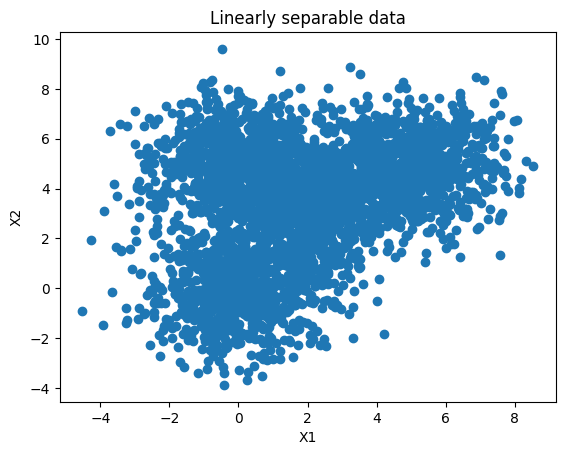

In [4]:
# Generate scatter plot for training data
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Picking a machine learning model class

Now that we have our code for generating the dataset, we can take a look at the output to determine what kind of model we could use:


I can derive a few characteristics from this dataset (which, obviously, I also built-in up front ;-) ).

First of all, the number of features is low: only two — as our data is two-dimensional. This is good, because then we likely don’t face the curse of dimensionality, and a wider range of ML models is applicable.

Next, when inspecting the data from a closer point of view, I can see a gap between what seem to be blobs of data (it is also slightly visible in the diagram above):


This suggests that the data may be separable, and possibly even linearly so (yes, of course, I know this is the case ;-) ).

Third, and finally, the number of samples is relatively low: only 5,000 samples are present. Neural networks with their relatively large amount of trainable parameters would likely start overfitting relatively quickly, so they wouldn’t be my preferred choice.

However, traditional machine learning techniques to the rescue. A Support Vector Machine, which attempts to construct a decision boundary between separable blobs of data, can be a good candidate here. Let’s give it a try: we’re going to construct and train an SVM and see how well it performs through its confusion matrix.